# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e11/train.csv")
test  = pd.read_csv("/kaggle/input/playground-series-s5e11/test.csv")
sub   = pd.read_csv("/kaggle/input/playground-series-s5e11/sample_submission.csv")

In [3]:
ID_COL = sub.columns[0]
TARGET = sub.columns[1] if sub.columns[1] in train.columns else (
    "loan_paid_back" if "loan_paid_back" in train.columns else
    "Loan_Status" if "Loan_Status" in train.columns else
    [c for c in train.columns if c not in test.columns][-1]
)

In [4]:
print({"train_shape": train.shape, "test_shape": test.shape, "id": ID_COL, "target": TARGET})

{'train_shape': (593994, 13), 'test_shape': (254569, 12), 'id': 'id', 'target': 'loan_paid_back'}


In [5]:
display(train.head(10))

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0
6,6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
7,7,45953.31,0.100,654,10111.62,12.82,Female,Married,High School,Employed,Home,D1,1.0
8,8,30592.29,0.132,713,7522.36,9.48,Male,Married,Bachelor's,Employed,Education,C5,1.0
9,9,17342.45,0.121,548,9653.48,16.04,Female,Married,Bachelor's,Self-employed,Vacation,F1,1.0


In [6]:
display(test.head(10))

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
5,593999,45302.90,0.060,675,8106.78,13.74,Female,Married,High School,Employed,Vacation,C3
6,594000,27676.47,0.061,714,8242.26,13.87,Female,Single,High School,Employed,Debt consolidation,C4
7,594001,38216.91,0.095,719,3765.50,15.10,Male,Single,High School,Employed,Other,C5
8,594002,25650.59,0.101,664,20310.64,11.74,Male,Single,High School,Employed,Education,D4
9,594003,62497.03,0.207,651,5177.58,13.90,Female,Divorced,High School,Unemployed,Car,D2


In [7]:
# Missing values
mv_train = train.isna().sum().sort_values(ascending=False)
mv_test  = test.isna().sum().sort_values(ascending=False)

In [8]:
display(mv_train[mv_train>0].head(25))

Series([], dtype: int64)

In [9]:
display(mv_test[mv_test>0].head(25))

Series([], dtype: int64)

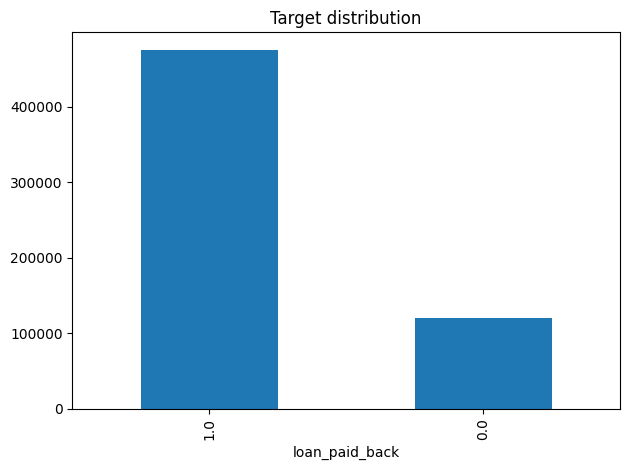

In [10]:
# Target distribution
train[TARGET].value_counts(dropna=False).plot(kind="bar")
plt.title("Target distribution"); plt.tight_layout(); plt.show()

In [11]:
# Numeric overview
num_cols = train.drop(columns=[TARGET]).select_dtypes(include=[np.number]).columns.tolist()
desc = train[num_cols].describe().T.sort_values("std", ascending=False)
display(desc.head(25))

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442235,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627


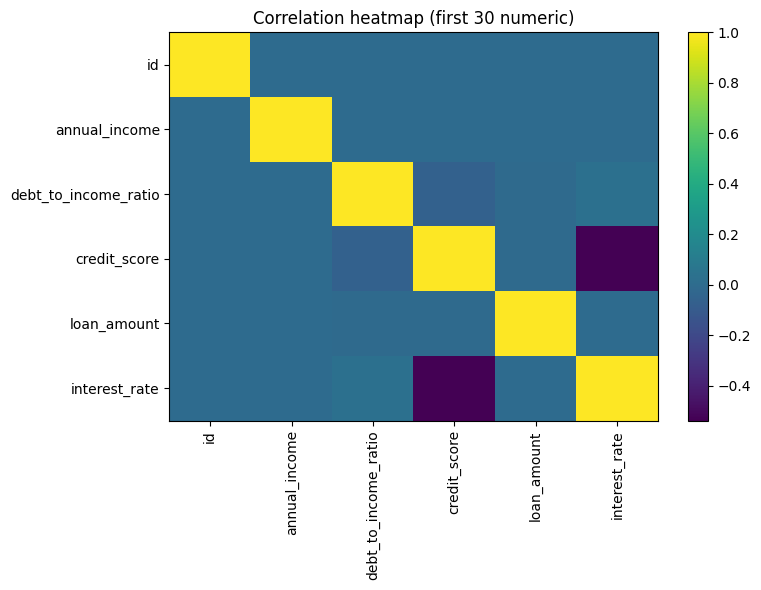

In [12]:
# Correlation (cap to 30 numeric cols for readability)
if len(num_cols) > 1:
    corr_cols = num_cols[:30]
    corr = train[corr_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    plt.imshow(corr, aspect="auto")
    plt.colorbar(); plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
    plt.yticks(range(len(corr_cols)), corr_cols)
    plt.title("Correlation heatmap (first 30 numeric)");
    plt.tight_layout();
    plt.show()

# Feature Engineering

In [13]:
def feature_engineering(df):
    df = df.copy()
    df["MissingCount"] = df.isna().sum(axis=1)

    # Loan-style features (created only if columns exist)
    if {"ApplicantIncome","CoapplicantIncome"}.issubset(df.columns):
        df["TotalIncome"] = df["ApplicantIncome"].fillna(0) + df["CoapplicantIncome"].fillna(0)
        df["IncomeDiff"]  = df["ApplicantIncome"].fillna(0) - df["CoapplicantIncome"].fillna(0)
        denom = df["CoapplicantIncome"].replace(0, np.nan)
        df["IncomeRatio"] = (df["ApplicantIncome"] / denom).replace([np.inf, -np.inf], np.nan)

    if {"LoanAmount","Loan_Amount_Term"}.issubset(df.columns):
        denom_t = df["Loan_Amount_Term"].replace(0, np.nan)
        df["AmountPerTerm"] = (df["LoanAmount"] / denom_t).replace([np.inf, -np.inf], np.nan)

    if {"annual_income","loan_amount"}.issubset(df.columns):
        denom_l = df["annual_income"].replace(0, np.nan)
        df["LoanToIncome"] = (df["loan_amount"] / denom_l).replace([np.inf, -np.inf], np.nan)

    return df

In [14]:
X = train.drop(columns=[TARGET])
y = train[TARGET]
X = feature_engineering(X)
test_fe = feature_engineering(test)

In [15]:
# Encode target if strings
if y.dtype == object or str(y.dtype).startswith("category"):
    classes = sorted(y.dropna().unique())
    if set(classes) == {"N","Y"}: enc_map = {"N":0,"Y":1}
    else: enc_map = {c:i for i,c in enumerate(classes)}
    y = y.map(enc_map)
    inv_map = {v:k for k,v in enc_map.items()}
else:
    enc_map = None

# Training Pipelines

In [16]:
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score

In [17]:
# Columns
if ID_COL in X.columns:
    X = X.drop(columns=[ID_COL])
if ID_COL in test_fe.columns:
    test_fe = test_fe.drop(columns=[ID_COL])

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

numeric = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler(with_mean=False))
])
categorical = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("enc", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])
pre = ColumnTransformer([
    ("num", numeric, num_cols),
    ("cat", categorical, cat_cols)
], remainder="drop", sparse_threshold=0.3)

In [18]:
# Define model candidates
ModelDefs = [
    ("LightGBM", lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.03,
        max_depth=-1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )),
    ("XGBoost", XGBClassifier(
        n_estimators=1200,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )),
    ("HistGB", HistGradientBoostingClassifier(
        learning_rate=0.06,
        max_depth=None,
        max_leaf_nodes=31,
        random_state=42
    ))
]
is_binary = (y.nunique() == 2)
scoring = "roc_auc" if is_binary else "accuracy"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for name, model in ModelDefs:
    pipe = Pipeline([("pre", pre), ("clf", model)])
    
    # Sample large datasets to 200k rows for faster CV
    if len(X) > 200_000:
        from sklearn.model_selection import train_test_split
        Xs, _, ys, _ = train_test_split(X, y, train_size=200_000, stratify=y, random_state=42)
    else:
        Xs, ys = X, y

    scores = cross_val_score(pipe, Xs, ys, cv=cv, scoring=scoring, n_jobs=-1)
    results.append((name, scores.mean(), scores.std(), scores))
    print(f"{name}: {scoring} {scores.mean():.5f} ± {scores.std():.5f} | {np.round(scores,5)}")

LightGBM: roc_auc 0.92012 ± 0.00166 | [0.91875 0.92173 0.91832 0.92247 0.91932]
XGBoost: roc_auc 0.91969 ± 0.00195 | [0.91809 0.92206 0.91773 0.92205 0.91851]
HistGB: roc_auc 0.91708 ± 0.00176 | [0.91563 0.91905 0.91545 0.9194  0.91588]


In [19]:
best = max(results, key=lambda t: t[1])
print({"selected_model": best[0], "cv_mean": best[1], "cv_std": best[2]})

best_name = best[0]
best_model = [m for m in ModelDefs if m[0] == best_name][0][1]

# Final fit on full data
final_pipe = Pipeline([("pre", pre), ("clf", best_model)])
final_pipe.fit(X, y)

{'selected_model': 'LightGBM', 'cv_mean': 0.9201194566882389, 'cv_std': 0.0016630051819875123}
[LightGBM] [Info] Number of positive: 474494, number of negative: 119500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set: 593994, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798820 -> initscore=1.378933
[LightGBM] [Info] Start training from score 1.378933


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sc',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['annual_income',
                                                   'debt_to_income_ratio',
                                                   'credit_score',
                                                   'loan_amount',
                                                   'interest_rate',
                                                   'MissingCount',
                                                   'LoanToIncome']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['gender', 'marital_status',
                                                   'education_level',
                                                   'employment_status',
                                                   'loan_purpose',
                                                   'grade_subgrade'])])),
                ('clf',
                 LGBMClassifier(colsample_bytree=0.8, learning_rate=0.03,
                                n_estimators=1000, n_jobs=-1, random_state=42,
                                subsample=0.8))])

In [20]:
# Predict class labels for Kaggle (most Playground tasks expect labels, not probabilities)
y_pred = final_pipe.predict(test_fe)

# Map back to original labels if target was strings
if enc_map is not None:
    y_pred = pd.Series(y_pred).map(inv_map).values

submission = pd.DataFrame({
    sub.columns[0]: test[ID_COL].values,
    sub.columns[1]: y_pred
})
submission.to_csv("submission.csv", index=False)
submission.head()

,id,loan_paid_back
0,593994,1.0
1,593995,1.0
2,593996,1.0
3,593997,1.0
4,593998,1.0


In [21]:
# Optional; skip if time is tight
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipe = Pipeline([("pre", pre), ("clf", best_model)])
pipe.fit(X_tr, y_tr)

metric = roc_auc_score(y_val, pipe.predict_proba(X_val)[:,1]) if is_binary and hasattr(best_model,"predict_proba") else accuracy_score(y_val, pipe.predict(X_val))
print({"holdout_metric": metric, "metric_name": scoring})

# Permutation importances over preprocessed features
# Build feature name list matching ColumnTransformer order
feat_names = [f"(num){c}" for c in num_cols] + [f"(cat){c}" for c in cat_cols]
perm = permutation_importance(pipe, X_val, y_val, n_repeats=5, random_state=42, scoring=scoring, n_jobs=-1)
imp = pd.Series(perm.importances_mean, index=feat_names).sort_values(ascending=False)
imp.head(25)

[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798819 -> initscore=1.378932
[LightGBM] [Info] Start training from score 1.378932
{'holdout_metric': 0.9212606077873322, 'metric_name': 'roc_auc'}


(cat)marital_status          1.847363e-01
(num)debt_to_income_ratio    8.557588e-02
(num)credit_score            3.492634e-02
(cat)employment_status       2.430434e-03
(num)annual_income           2.159288e-03
(cat)grade_subgrade          1.809860e-03
(num)loan_amount             1.123403e-03
(num)interest_rate           5.534264e-04
(cat)gender                  1.391133e-04
(cat)education_level         1.273540e-04
(num)MissingCount            2.128676e-05
(cat)loan_purpose            0.000000e+00
(num)LoanToIncome           -3.372888e-07
dtype: float64